In [3]:
import pandas as pd

In [11]:
c15 = pd.read_csv('2015.csv' , encoding='euc-kr', index_col='관서명')
c16 = pd.read_csv('2016.csv' , encoding='euc-kr', index_col='관서명')
c17 = pd.read_csv('2017.csv' , encoding='euc-kr', index_col='관서명')

In [28]:
c15.head(2)

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주지방경찰청계,검거건수,18,47,758,5409,8301


In [21]:
total15 = c15.loc[c15['구분'] == '발생건수', '살인' :].sum(axis=1)
total15

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

In [22]:
total16 = c16.loc[c16['구분'] == '발생건수', '살인' :].sum(axis=1)
total16

관서명
광주지방경찰청계    15416
광주동부경찰서      2068
광주서부경찰서      3892
광주남부경찰서      1865
광주북부경찰서      4148
광주광산경찰서      3443
dtype: int64

In [26]:
total17 = c17.loc[c17['구분'] == '발생건수', '살인' :].sum(axis=1)
total17.drop('광주지방경찰청', inplace=True)
total17

관서명
광주지방경찰청계    13949
광주동부경찰서      1799
광주서부경찰서      3638
광주남부경찰서      1547
광주북부경찰서      3945
광주광산경찰서      3020
dtype: int64

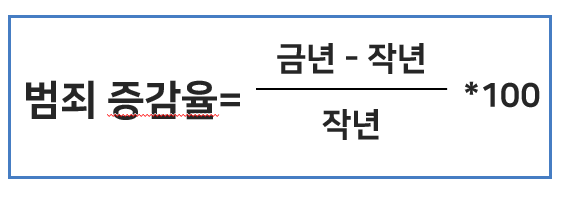

In [81]:
# 증감율
# 2015~2016
s5 = (total16-total15) / total15 * 100
# 2016~2017
s6 = (total17-total16) / total16 * 100
s5.name = '2015-2016증감율'
s6.name = '2016-2017증감율'
print(s5)
print(s6)

관서명
광주지방경찰청계   -18.130643
광주동부경찰서    -12.186837
광주서부경찰서    -17.542373
광주남부경찰서    -11.903637
광주북부경찰서    -24.112697
광주광산경찰서    -17.473634
Name: 2015-2016증감율, dtype: float64
관서명
광주지방경찰청계    -9.516087
광주동부경찰서    -13.007737
광주서부경찰서     -6.526208
광주남부경찰서    -17.050938
광주북부경찰서     -4.893925
광주광산경찰서    -12.285797
Name: 2016-2017증감율, dtype: float64


In [110]:
total15.name = '2015총계'
total16.name = '2016총계'
total17.name = '2017총계'

resultDf1 = pd.concat([total15, s5, total16, s6, total17], axis=1)
resultDf1

,2015총계,2015-2016증감율,2016총계,2016-2017증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


In [87]:
# 1. 컬럼명 수정
resultDf1.columns = ['2015총계', '2015-2016증감율', '2016총계', '2016-2017증감율', '2017총계']

In [93]:
# 2. 컬럼명 수정 (rename)
resultDf1.rename( columns={0:'2015총계', 1:'2016총계', 3:'2017총계'} , inplace=True)

In [59]:
from tabulate import tabulate

In [88]:
print(tabulate(resultDf1, headers='keys', tablefmt='psql', showindex=True, stralign='center', numalign='center'))

+------------------+------------+-------------------+------------+-------------------+------------+
|      관서명      |  2015총계  |  2015-2016증감율  |  2016총계  |  2016-2017증감율  |  2017총계  |
|------------------+------------+-------------------+------------+-------------------+------------|
| 광주지방경찰청계 |   18830    |     -18.1306      |   15416    |     -9.51609      |   13949    |
|  광주동부경찰서  |    2355    |     -12.1868      |    2068    |     -13.0077      |    1799    |
|  광주서부경찰서  |    4720    |     -17.5424      |    3892    |     -6.52621      |    3638    |
|  광주남부경찰서  |    2117    |     -11.9036      |    1865    |     -17.0509      |    1547    |
|  광주북부경찰서  |    5466    |     -24.1127      |    4148    |     -4.89392      |    3945    |
|  광주광산경찰서  |    4172    |     -17.4736      |    3443    |     -12.2858      |    3020    |
+------------------+------------+-------------------+------------+-------------------+------------+


In [66]:
import numpy as np

In [73]:
styles = [dict(selector = "thead th", 
               props = [("font-size", "150%"), ("text-align", "center")])]
styles

[{'selector': 'thead th',
  'props': [('font-size', '150%'), ('text-align', 'center')]}]

In [84]:
resultDf1.style.set_table_styles(styles)

,2015총계,2015-2016증감율,2016총계,2016-2017증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


In [85]:
dfStyler = resultDf1.style.set_properties(**{'text-align': 'right'})

dfStyler.set_table_styles([dict(selector='th',
                                props=[('text-align', 'right')])])

,2015총계,2015-2016증감율,2016총계,2016-2017증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020
